In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [105]:
estirar = np.array([2.0, 0.5])
theta = np.pi / 3
rotar = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])

np.random.seed(42)
N = 1000
X = rotar @ np.diag(estirar) @ np.random.randn(2, N) + np.diag([2, 3]) @ np.ones(shape=(2, N))
# X = X - X.mean(axis=0)

In [106]:
X.shape

(2, 1000)

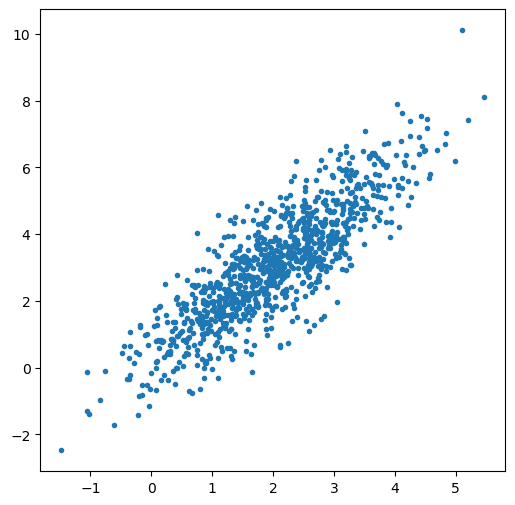

In [119]:
_, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X[0,:], X[1,:], marker=".");

In [130]:
u, s, v = np.linalg.svd(X, full_matrices=False)

In [131]:
u

array([[-0.53834276, -0.84272598],
       [-0.84272598,  0.53834276]])

In [132]:
np.diag(s)

array([[130.73399983,   0.        ],
       [  0.        ,  15.91433056]])

In [135]:
v.shape

(2, 1000)

In [142]:
pca = PCA(svd_solver="covariance_eigh")
pca.fit(X)
pca.explained_variance_

array([1.03328428e+03, 4.38695448e-13])

In [143]:
pca.components_

array([[ 0.05102115,  0.03366335,  0.03332347, ...,  0.01906747,
         0.01034967,  0.0200262 ],
       [-0.01527169, -0.0398327 ,  0.01300887, ...,  0.02161058,
         0.01413213,  0.02506109]], shape=(2, 1000))

In [145]:
pca

,n_components,None
,copy,True
,whiten,False
,svd_solver,'covariance_eigh'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [322]:
np.random.seed(42)
X = np.random.randn(10, 3)  # 10 observaciones, 3 variables
X_centered = X - X.mean(axis=0)

# 2️⃣ Aplicamos PCA
pca = PCA(svd_solver="covariance_eigh")
pca.fit(X_centered)

# Autovalores del PCA (varianzas explicadas)
lambda_pca = pca.explained_variance_

# 3️⃣ Aplicamos SVD
U, sigma, VT = np.linalg.svd(X_centered, full_matrices=False)

# Autovalores equivalentes desde SVD
n = X_centered.shape[0]
lambda_svd = (sigma ** 2) / (n - 1)

# 4️⃣ Mostramos resultados
print("Autovalores de PCA (varianza explicada):")
print(lambda_pca)

print("\nAutovalores equivalentes desde SVD:")
print(lambda_svd)

print("\n¿Coinciden?:", np.allclose(lambda_pca, lambda_svd))

Autovalores de PCA (varianza explicada):
[1.139166   0.78744362 0.34832021]

Autovalores equivalentes desde SVD:
[1.139166   0.78744362 0.34832021]

¿Coinciden?: True


In [265]:
VT

array([[-0.57561026, -0.48303245,  0.65981246],
       [ 0.48111412,  0.45240071,  0.75090798],
       [-0.66121255,  0.74967543, -0.02801275]])

In [266]:
pca.components_

array([[-0.57561026, -0.48303245,  0.65981246],
       [ 0.48111412,  0.45240071,  0.75090798],
       [-0.66121255,  0.74967543, -0.02801275]])

In [267]:
pca.singular_values_

array([3.20195159, 2.6621406 , 1.77055977])

In [268]:
sigma

array([3.20195159, 2.6621406 , 1.77055977])

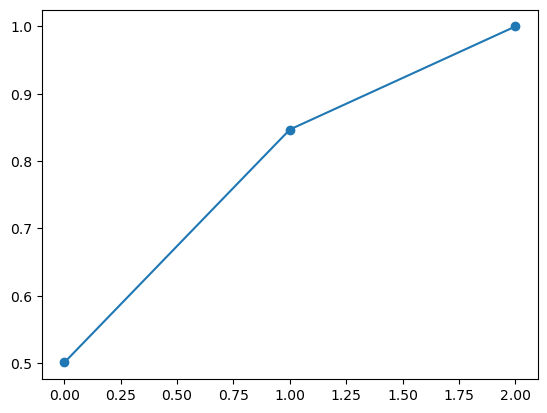

In [278]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o");

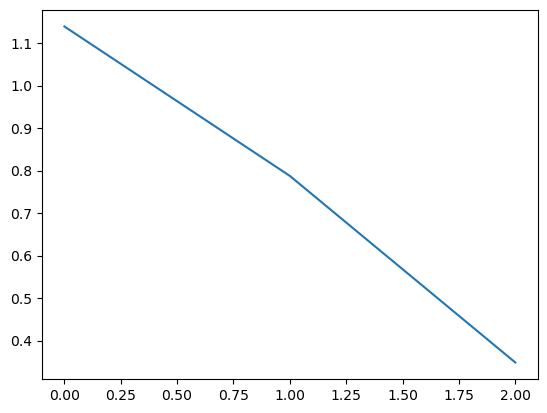

In [275]:
plt.plot(pca.explained_variance_);

## Pruebas

In [568]:
np.random.seed(42)
theta = np.pi / 4
rotar = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
x = np.random.randn(1000, 2) @ np.diag([2, 0.5]) @ rotar + np.ones((1000, 2)) @ rotar
xc = x - x.mean(axis=0)
xc.shape

(1000, 2)

In [569]:
xc.mean(axis=0).round(4)

array([-0., -0.])

In [570]:
u, s, vt = np.linalg.svd(xc, False)

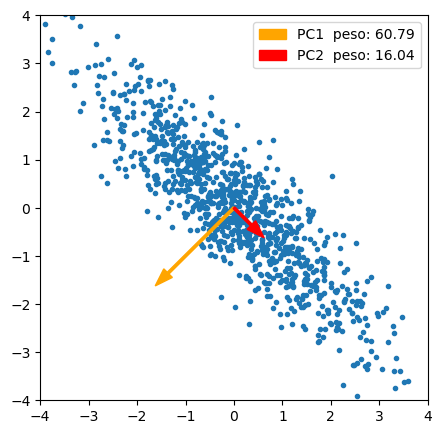

In [576]:
_, ax = plt.subplots(figsize=(5,5))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
# ax.plot(vt[0,:] + np.ones(2), color='red')
# ax.plot(vt[1,:] + np.ones(2), color='red')
ax.scatter(xc[:,0], xc[:,1], marker='.');

scale = 1  # escala visual de las flechas
for i in range(2):
    # La longitud del vector está relacionada con el valor singular
    vector = vt[:, i] * s[i] * scale / np.sqrt(len(xc))
    plt.arrow(0, 0, vector[0], vector[1],
              color=['orange', 'red'][i],
              width=0.05, head_width=0.25,
              label=f'PC{i+1}  peso: {s[i]:.2f}')
ax.legend();

In [572]:
np.var(xc @ vt, axis=0)

array([0.25728359, 3.69501973])

In [573]:
s

array([60.78673473, 16.03983183])